In [ ]:
class CustomLinearRegression :
    def __init__ ( self , X_data , y_target , learning_rate =0.01 , num_epochs =10000) :
        self . num_samples = X_data . shape [0]
        self . X_data = np . c_ [ np . ones (( self . num_samples , 1) ) , X_data ]
        self . y_target = y_target
        self . learning_rate = learning_rate
        self . num_epochs = num_epochs
        # Initial weights
        self . theta = np . random . randn ( self . X_data . shape [1] , 1)
        self . losses = []

    def compute_loss ( self , y_pred , y_target ) :
        return loss

    def predict ( self , X_data ) :
        *** Your Code Here ***
        return y_pred

    def fit ( self ) :
        for epoch in range ( self . num_epochs ) :

            *** Your Code Here ***

            if ( epoch % 50) == 0:
                print (f'Epoch : { epoch } - Loss : { loss }')

        return {
            'loss': sum( self . losses ) / len( self . losses ) ,
            'weight': self . theta}


# Q1: A
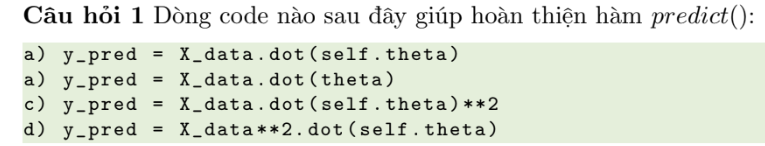

# Q2: C
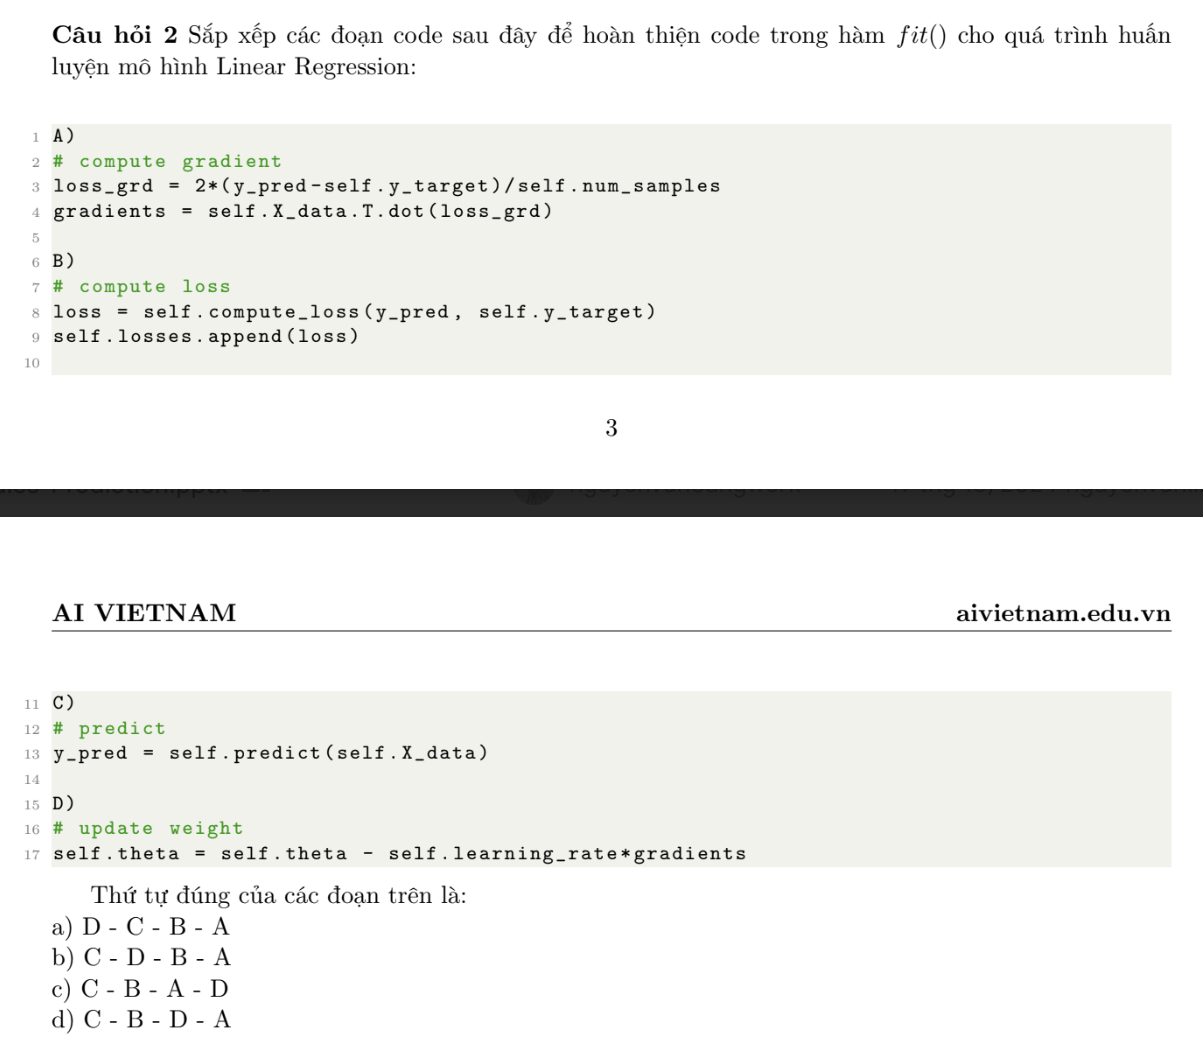

# Q3: D
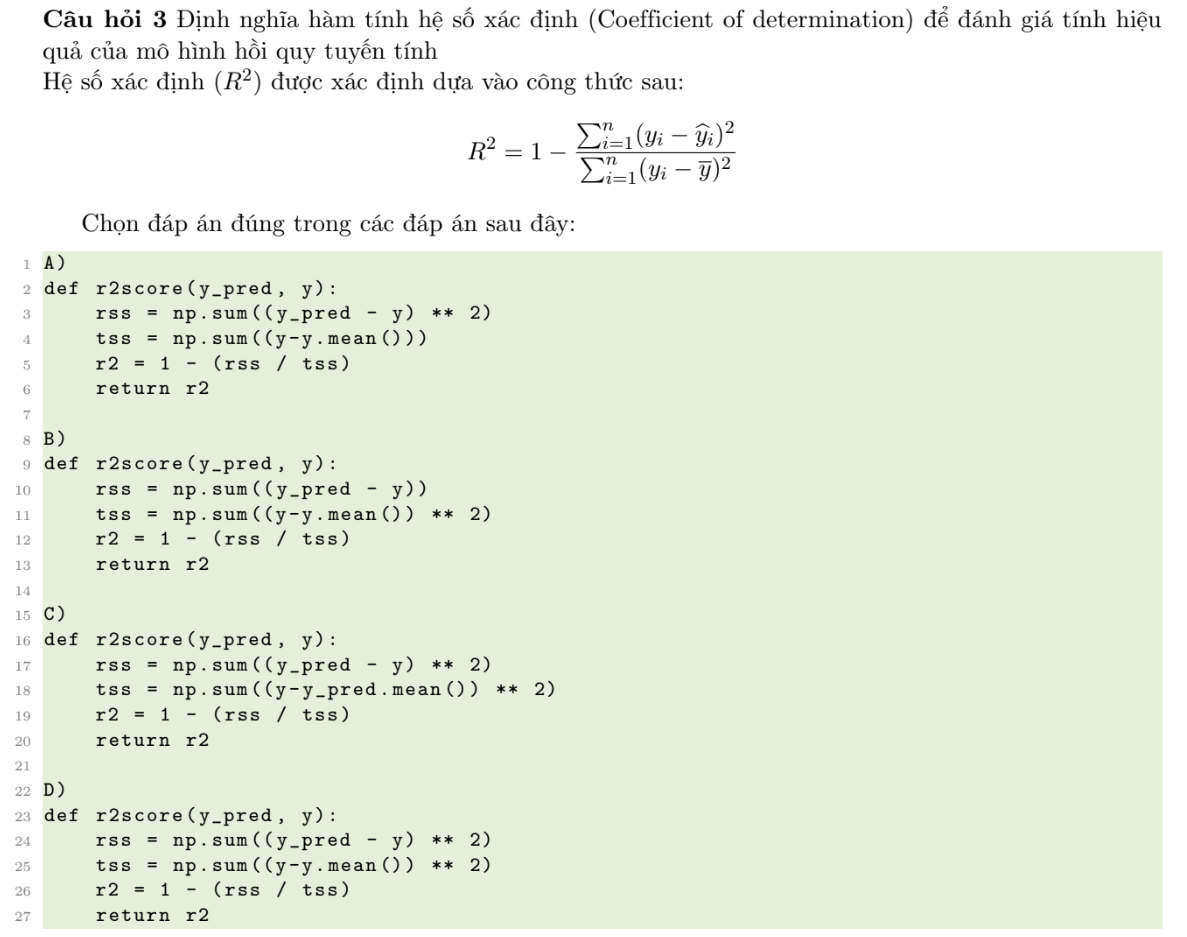

# Q4: B
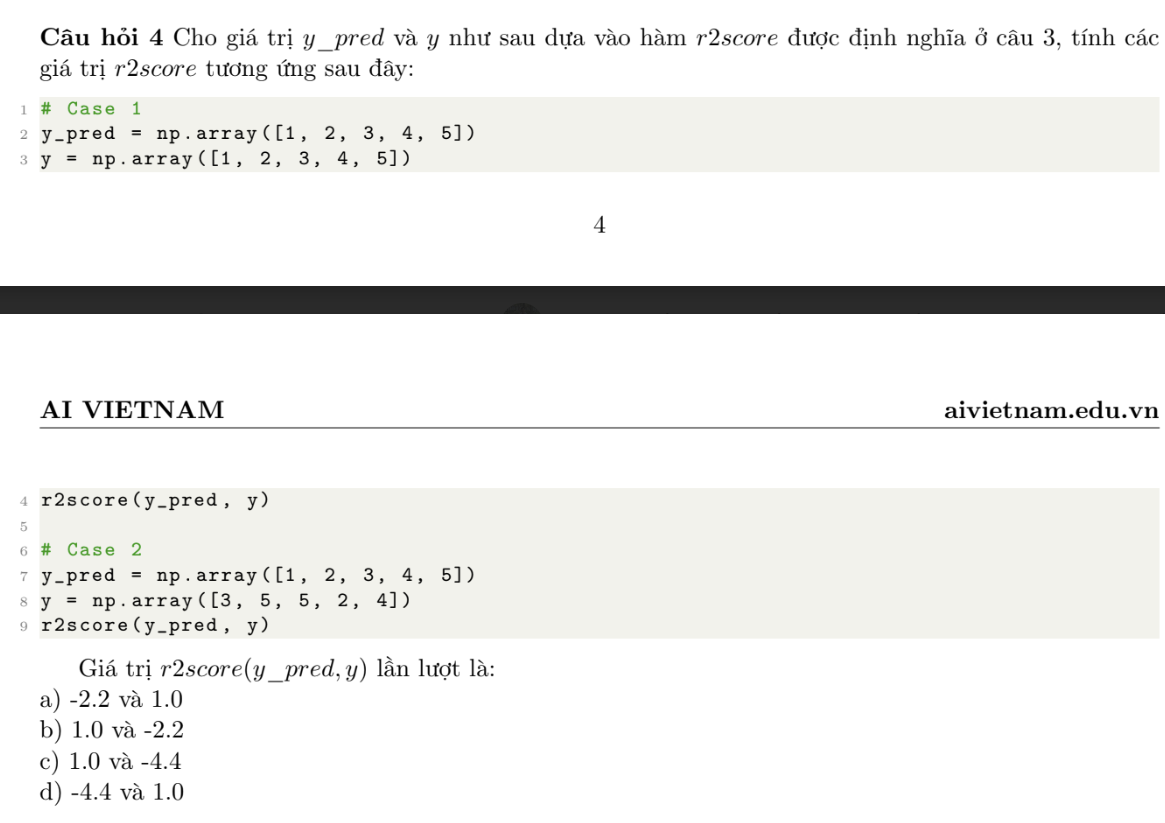

In [8]:
import numpy as np

def r2score ( y_pred , y ):
    rss = np . sum (( y_pred - y ) ** 2)
    tss = np . sum (( y - y . mean () ) ** 2)
    r2 = 1 - ( rss / tss )
    return r2
    
# Case 1
y_pred = np . array ([1 , 2 , 3 , 4 , 5])
y = np . array ([1 , 2 , 3 , 4 , 5])
r2score ( y_pred , y )

# Case 2
y_pred = np . array ([1 , 2 , 3 , 4 , 5])
y = np . array ([3 , 5 , 5 , 2 , 4])
r2score ( y_pred , y )

-2.235294117647059

# Q5: B
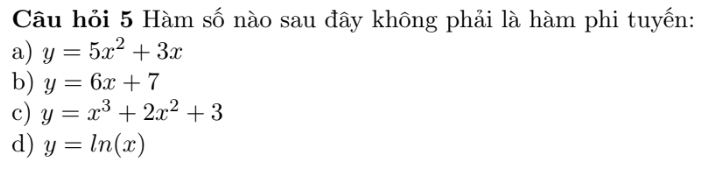

# Q6: B
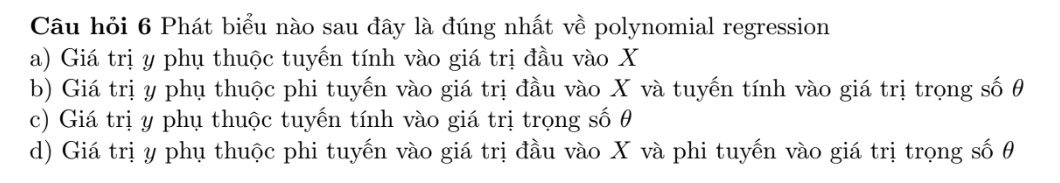

# Q7: A
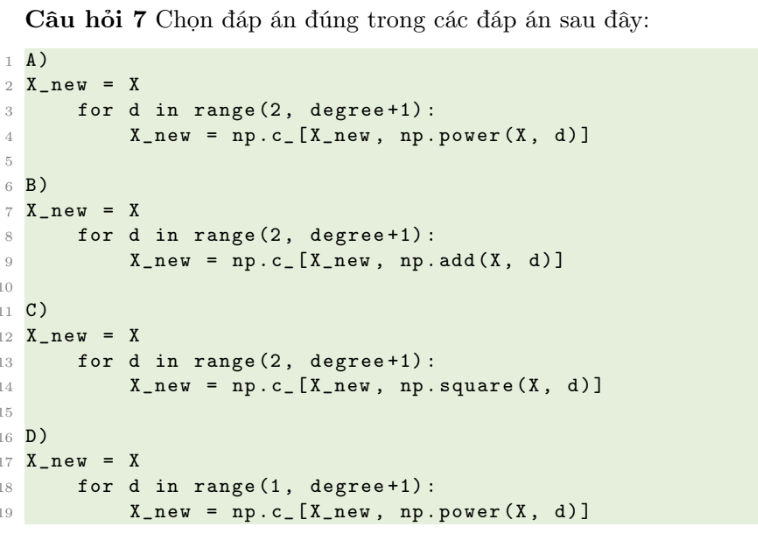

# Q8: D
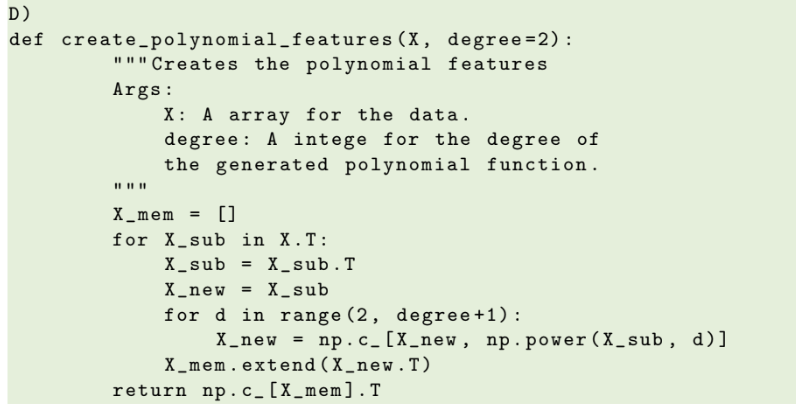

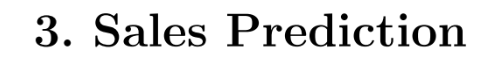

In [1]:
import pandas as pd
df = pd.read_csv('SalesPrediction.csv', delimiter=',')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


## Encoding Influencer column

In [3]:
df = pd.get_dummies(df)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


# Q9: A
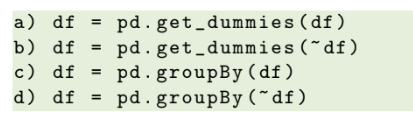

## Pre-processing data

In [5]:
# Handle Null values
df = df . fillna ( df . mean () )
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro','Influencer_Mega',
         'Influencer_Micro', 'Influencer_Nano']]
y = df[['Sales']]

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [19]:
from sklearn . preprocessing import StandardScaler
scaler = StandardScaler ()
X_train_processed = scaler . fit_transform ( X_train )
X_test_processed = scaler . transform ( X_test )
scaler . mean_ [0]

54.173577723283785

# Q10: A
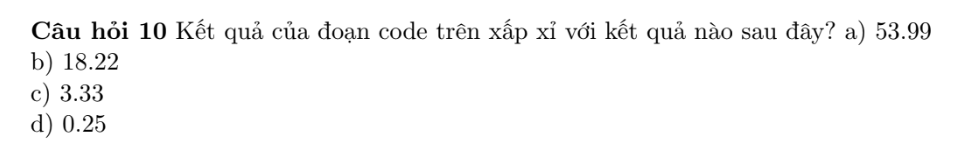

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed)
X_test_poly = poly_features . transform ( X_test_processed )

In [29]:
from sklearn . linear_model import LinearRegression
from sklearn . metrics import r2_score
poly_model = LinearRegression ()
poly_model . fit ( X_train_poly , y_train )
preds = poly_model . predict ( X_test_poly )
r2_score ( y_test , preds )

0.9951692439999518